In [3]:
!pip install xlrd
import pandas as pd

list_path = "/content/drive/MyDrive/AI-data/TIỀN/data/list_folder/list.xls"
df = pd.read_excel(list_path, engine='xlrd')
labels = df.iloc[:, 0].astype(str).tolist()

print("📌 Các mệnh giá có trong danh sách:")
print(labels)


📌 Các mệnh giá có trong danh sách:
['200', '500', '1000', '2000', '5000', '10000', '20000', '50000', '100000', '200000', '500000']


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/drive/MyDrive/AI-data/TIỀN/data/data_folder"
img_width, img_height = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 188 images belonging to 9 classes.
Found 40 images belonging to 9 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,247,881 (84.87 MB)

 Trainable params: 22,247,433 (84.87 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.1249 - loss: 31.2017 - val_accuracy: 0.1000 - val_loss: 3.2921
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - accuracy: 0.3648 - loss: 11.5777 - val_accuracy: 0.1750 - val_loss: 3.5326
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 48s 8s/step - accuracy: 0.4519 - loss: 7.2530 - val_accuracy: 0.1750 - val_loss: 2.8014
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.5014 - loss: 3.2333 - val_accuracy: 0.1750 - val_loss: 5.7329
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.4193 - loss: 3.9628 - val_accuracy: 0.1250 - val_loss: 11.0344
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.5067 - loss: 1.3726 - val_accuracy: 0.1000 - val_loss: 17.7922
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.4529 - loss: 1.6498 - val_accuracy: 0.1250 - val_loss: 25.0621
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - accuracy: 0.4883 - loss: 1.6550 - val_accuracy: 0.1250 - val_loss: 29.1583
Ep

Saving 1633075525818.jpg to 1633075525818.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


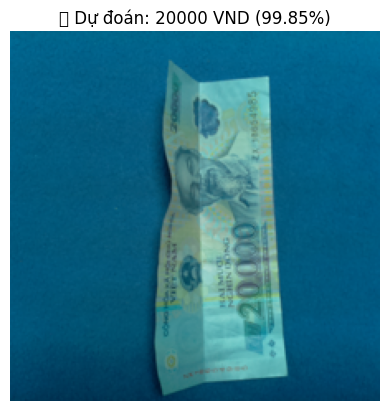

In [13]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

class_names = list(train_generator.class_indices.keys())

for file_name in uploaded.keys():
    img = Image.open(file_name).convert('RGB')
    img = img.resize((img_width, img_height))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    pred_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"💵 Dự đoán: {pred_class} VND ({confidence:.2f}%)")
    plt.show()
